In [83]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# Load the dataset
dataset = 'Jumlah Penumpang Angkutan Umum yang Terlayani Perhari.xlsx'
data = pd.read_excel(dataset)

# Show the first few rows of the dataset
print(data.head())

   periode_data  tanggal    jenis_moda  jumlah_penumpang_per_hari
0        202401    45292  transjakarta                   632778.0
1        202401    45293  transjakarta                  1045214.0
2        202401    45294  transjakarta                  1041663.0
3        202401    45295  transjakarta                  1097752.0
4        202401    45296  transjakarta                  1105303.0


In [6]:
# Check for missing values and data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1491 entries, 0 to 1490
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   periode_data               1491 non-null   int64  
 1   tanggal                    1491 non-null   int64  
 2   jenis_moda                 1491 non-null   object 
 3   jumlah_penumpang_per_hari  1491 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 46.7+ KB
None


In [56]:
# Convert 'tanggal' column to datetime if it's not already
# if not isinstance(data['tanggal'].dtype, pd.DatetimeTZDtype):
#     data['tanggal'] = pd.to_datetime(data['tanggal'])

# Calculate the difference in days from a reference date and add it to the reference date
# Use a vectorized operation for efficiency
data['tanggal'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(data['tanggal'], unit='D')

# Check the updated data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1491 entries, 0 to 1490
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   periode_data               1491 non-null   int64         
 1   tanggal                    1491 non-null   datetime64[ns]
 2   jenis_moda                 1491 non-null   object        
 3   jumlah_penumpang_per_hari  1491 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 46.7+ KB
None


# Analisis Pola Kebiasaan Penumpang Harian (Weekday vs Weekend)

In [57]:
# Add a column for day of the week
data['hari'] = data['tanggal'].dt.day_name()

# Format 'tanggal' column to 'dd-mm-yyyy'
# data['tanggal'] = data['tanggal'].dt.strftime('%d-%m-%Y')

print(data.head())

   periode_data    tanggal    jenis_moda  jumlah_penumpang_per_hari       hari
0        202401 2024-01-01  transjakarta                   632778.0     Monday
1        202401 2024-01-02  transjakarta                  1045214.0    Tuesday
2        202401 2024-01-03  transjakarta                  1041663.0  Wednesday
3        202401 2024-01-04  transjakarta                  1097752.0   Thursday
4        202401 2024-01-05  transjakarta                  1105303.0     Friday


In [58]:
# Calculate average number of passengers for weekdays and weekends
weekday_data = data[data['hari'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
weekend_data = data[data['hari'].isin(['Saturday', 'Sunday'])]

print(weekend_data)

      periode_data    tanggal    jenis_moda  jumlah_penumpang_per_hari  \
5           202401 2024-01-06  transjakarta                   716205.0   
6           202401 2024-01-07  transjakarta                   624900.0   
12          202401 2024-01-13  transjakarta                   758105.0   
13          202401 2024-01-14  transjakarta                   683688.0   
19          202401 2024-01-20  transjakarta                   781421.0   
...            ...        ...           ...                        ...   
1468        202407 2024-07-21   bus sekolah                      431.0   
1474        202407 2024-07-27   bus sekolah                     1694.0   
1475        202407 2024-07-28   bus sekolah                     1881.0   
1484        202407 2024-07-06           krl                   772803.0   
1485        202407 2024-07-07           krl                   791548.0   

          hari  
5     Saturday  
6       Sunday  
12    Saturday  
13      Sunday  
19    Saturday  
...      

In [59]:
# Average
avg_weekday = weekday_data['jumlah_penumpang_per_hari'].mean()
avg_weekend = weekend_data['jumlah_penumpang_per_hari'].mean()

print(f"Average number of passengers on weekdays: {avg_weekday}")
print(f"Average number of passengers on weekends: {avg_weekend}")

Average number of passengers on weekdays: 314269.2221391223
Average number of passengers on weekends: 224673.78333333333


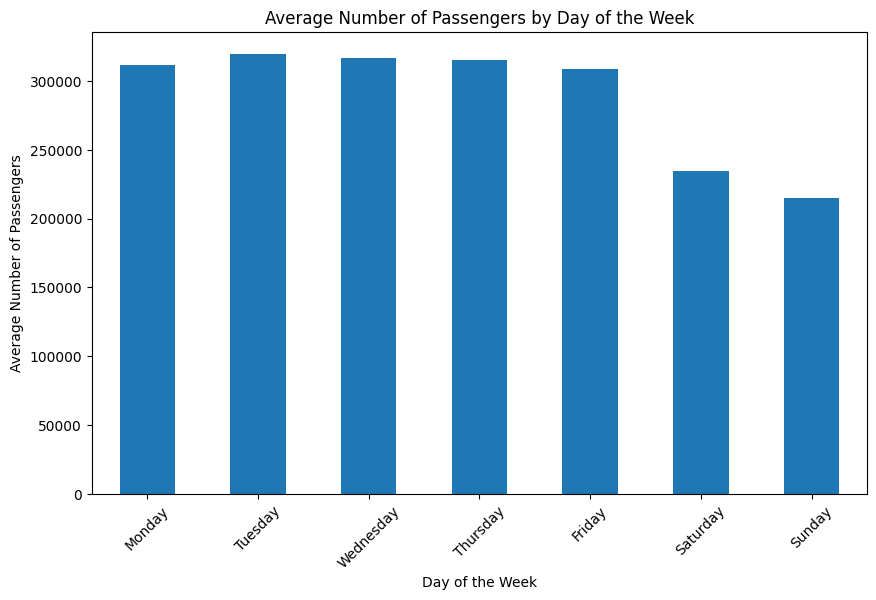

In [65]:
# Plotting the data
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
data.groupby('hari')['jumlah_penumpang_per_hari'].mean().reindex(day_order).plot(kind='bar')

plt.title('Average Number of Passengers by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Passengers')
plt.xticks(rotation=45)
plt.show()

In [70]:
avg = data.groupby('hari')['jumlah_penumpang_per_hari'].mean().reindex(day_order)
print(avg)

hari
Monday       311326.723092
Tuesday      319590.294931
Wednesday    316377.824885
Thursday     315220.019048
Friday       308681.676190
Saturday     234260.585714
Sunday       215086.980952
Name: jumlah_penumpang_per_hari, dtype: float64


# Analisis Rata-rata Penumpang per Moda

In [73]:
# Average mode
average_per_moda = data.groupby('jenis_moda')['jumlah_penumpang_per_hari'].mean().sort_values(ascending=False)

print("Average number of passengers per mode of transportation:")
print(average_per_moda.round())

Average number of passengers per mode of transportation:
jenis_moda
transjakarta            1012073.0
krl                      874465.0
mrt                      102083.0
bus sekolah               21705.0
KCI Commuter Bandara       6036.0
kapal                      3608.0
lrt                        3248.0
Name: jumlah_penumpang_per_hari, dtype: float64


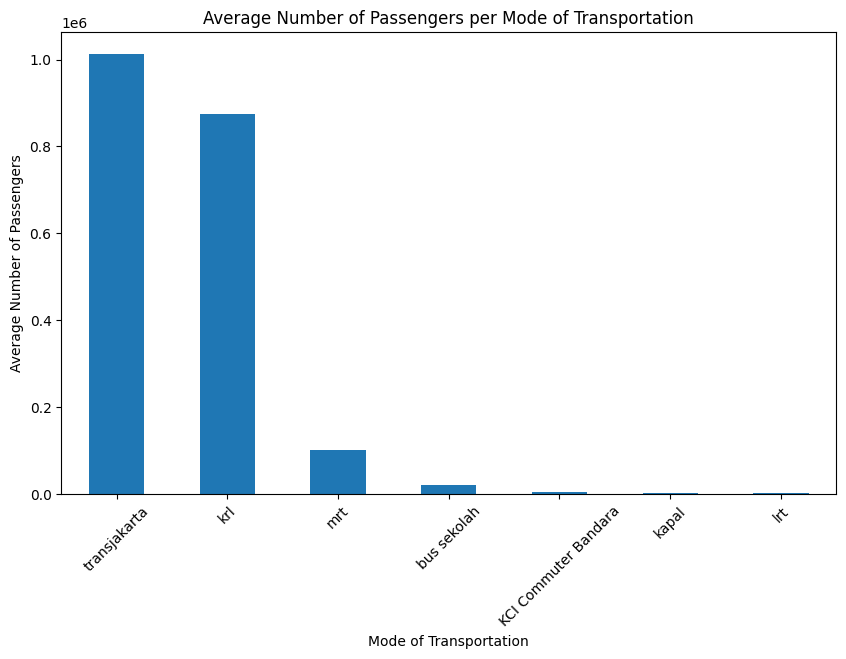

In [74]:
# Plotting the data
plt.figure(figsize=(10, 6))

average_per_moda.plot(kind='bar')

plt.title('Average Number of Passengers per Mode of Transportation')
plt.xlabel('Mode of Transportation')
plt.ylabel('Average Number of Passengers')
plt.xticks(rotation=45)
plt.show()

# Penghitungan Rata-rata Penumpang per Hari

In [76]:
# Calculate daily average number of passengers
daily_avg = data.groupby('tanggal')['jumlah_penumpang_per_hari'].mean()

print("Daily average number of passengers:")
print(daily_avg.round())

Daily average number of passengers:
tanggal
2024-01-01    226515.0
2024-01-02    312610.0
2024-01-03    301708.0
2024-01-04    318111.0
2024-01-05    317230.0
                ...   
2024-07-27    255692.0
2024-07-28    224607.0
2024-07-29    349139.0
2024-07-30    326174.0
2024-07-31    346235.0
Name: jumlah_penumpang_per_hari, Length: 213, dtype: float64


In [77]:
# Calculate the total number of modes needed
# Assuming each mode has a capacity of X passengers
capacity_per_moda = 50  # example capacity
daily_avg_mean = daily_avg.mean()
modes_needed = daily_avg_mean / capacity_per_moda

print(f"Average number of modes needed per day: {modes_needed:.2f}")

Average number of modes needed per day: 5780.62


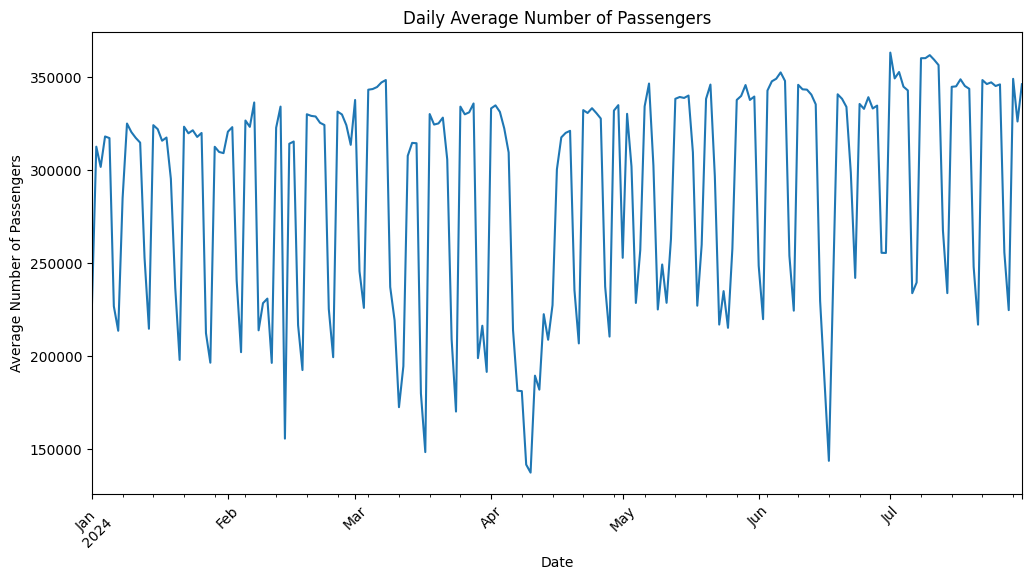

In [79]:
# Plotting the daily average
plt.figure(figsize=(12, 6))

daily_avg.plot(kind='line')

plt.title('Daily Average Number of Passengers')
plt.xlabel('Date')
plt.ylabel('Average Number of Passengers')
plt.xticks(rotation=45)
plt.show()

# Analisis jumlah penumpang per moda

In [82]:
# Group by jenis moda dan hitung rata-rata jumlah penumpang per hari
average_passengers_per_mode = data.groupby('jenis_moda')['jumlah_penumpang_per_hari'].mean().sort_values(ascending=False)

print("Rata-rata Jumlah Penumpang per Moda:")
print(average_passengers_per_mode.round())

Rata-rata Jumlah Penumpang per Moda:
jenis_moda
transjakarta            1012073.0
krl                      874465.0
mrt                      102083.0
bus sekolah               21705.0
KCI Commuter Bandara       6036.0
kapal                      3608.0
lrt                        3248.0
Name: jumlah_penumpang_per_hari, dtype: float64


<ipython-input-84-880a651da048>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_passengers_per_mode.index, y=average_passengers_per_mode.values, palette='viridis')


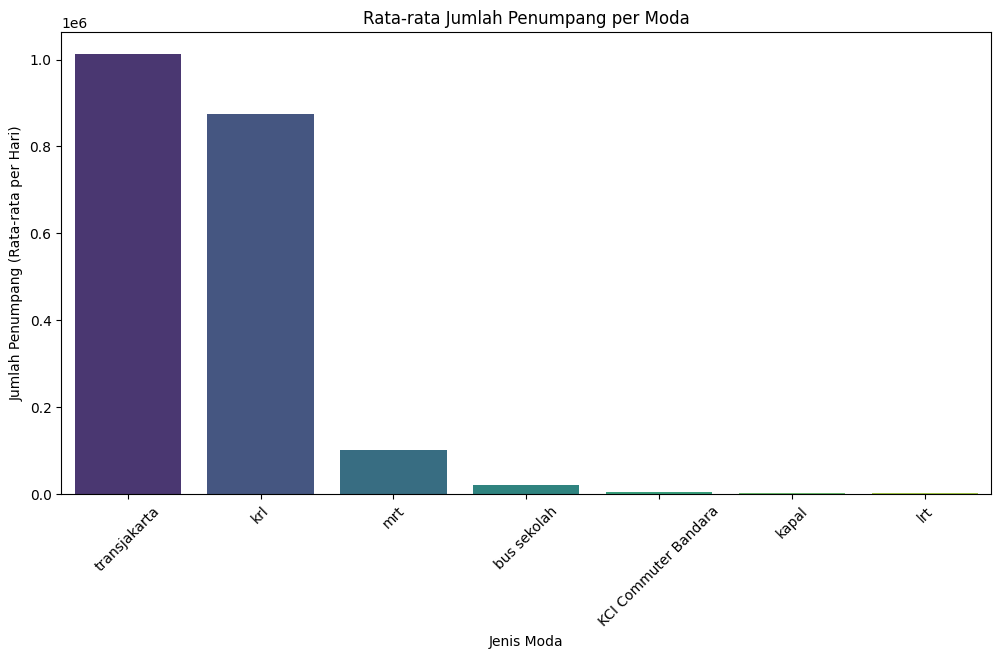

In [84]:
# Visualisasi rata-rata penumpang per moda
plt.figure(figsize=(12, 6))

sns.barplot(x=average_passengers_per_mode.index, y=average_passengers_per_mode.values, palette='viridis')

plt.title('Rata-rata Jumlah Penumpang per Moda')
plt.xlabel('Jenis Moda')
plt.ylabel('Jumlah Penumpang (Rata-rata per Hari)')
plt.xticks(rotation=45)
plt.show()